<a href="https://colab.research.google.com/github/brianmurerwa/Weights-and-Biases/blob/main/Weights_and_Biases_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to weights and Biases

<a href="https://colab.research.google.com/github/wandb/examples/blob/master/colabs/intro/Intro_to_Weights_&_Biases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<!--- @wandbcode{intro-colab} -->

<img src="http://wandb.me/logo-im-png" width="400" alt="Weights & Biases" />
<!--- @wandbcode{intro-colab} -->

# 🏃‍♀️ Quickstart
Use **[Weights & Biases](https://wandb.ai/site?utm_source=intro_colab&utm_medium=code&utm_campaign=intro)** for machine learning experiment tracking, model checkpointing, and collaboration with your team. See the full Weights & Biases Documentation **[here](https://docs.wandb.ai/quickstart)**

## 🤩 A shared dashboard for your experiments

With just a few lines of code,
you'll get rich, interactive, shareable dashboards [which you can see yourself here](https://wandb.ai/wandb/wandb_example).
![](https://i.imgur.com/Pell4Oo.png)


## 🔒 Data & Privacy

We take security very seriously, and our cloud-hosted dashboard uses industry standard best practices for encryption. If you're working with models and datasets that cannot leave your enterprise cluster, we have [on-prem](https://docs.wandb.com/self-hosted) installations available.

It's also easy to download all your data and export it to other tools — like custom analysis in a Jupyter notebook. Here's [more on our API](https://docs.wandb.com/library/api).

---

## 🪄 Install `wandb` library and login


Start by installing the library and logging in to your free account.



In [ ]:
!pip install wandb -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
# Log in to your W&B account
import wandb

# Use wandb-core
wandb.require("core")

In [ ]:
wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## 👟 Run an experiment
1️⃣. **Start a new run** and pass in hyperparameters to track

2️⃣. **Log metrics** from training or evaluation

3️⃣. **Visualize results** in the dashboard

In [ ]:
import random

# Launch 5 simulated experiments
total_runs = 5
for run in range(total_runs):
  # 🐝 1️⃣ Start a new run to track this script
  wandb.init(
      # Set the project where this run will be logged
      project="basic-intro",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"experiment_{run}",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": 0.02,
      "architecture": "CNN",
      "dataset": "CIFAR-100",
      "epochs": 10,
      })

  # This simple block simulates a training loop logging metrics
  epochs = 10
  offset = random.random() / 5
  for epoch in range(2, epochs):
      acc = 1 - 2 ** -epoch - random.random() / epoch - offset
      loss = 2 ** -epoch + random.random() / epoch + offset

      # 🐝 2️⃣ Log metrics from your script to W&B
      wandb.log({"acc": acc, "loss": loss})

  # Mark the run as finished
  wandb.finish()

wandb: Currently logged in as: brianmurerwa (brianmurerwa-usiu). Use `wandb login --relogin` to force relogin


acc,▁▅▅█▇██▇
loss,█▅▄▂▂▂▁▁
acc,0.71096
loss,0.29643


acc,▁▇▆▇▇███
loss,█▃▂▁▂▂▂▁
acc,0.73915
loss,0.16645


acc,▁▆▅█▇▇▇▇
loss,█▄▃▁▂▂▁▁
acc,0.83822
loss,0.08647


acc,▂▁▃▃▇▆▇█
loss,█▅▃▅▃▁▁▁
acc,0.82963
loss,0.19635


acc,▁▄▇█▆▇▇█
loss,█▇▅▂▂▂▁▂
acc,0.85003
loss,0.18722


3️⃣ You can find your interactive dashboard by clicking any of the  👆 wandb links above.

# 🔥 Simple Pytorch Neural Network

💪 Run this model to train a simple MNIST classifier, and click on the project page link to see your results stream in live to a W&B project.


Any run in `wandb` automatically logs [metrics](https://docs.wandb.ai/ref/app/pages/run-page#charts-tab),
[system information](https://docs.wandb.ai/ref/app/pages/run-page#system-tab),
[hyperparameters](https://docs.wandb.ai/ref/app/pages/run-page#overview-tab),
[terminal output](https://docs.wandb.ai/ref/app/pages/run-page#logs-tab) and
you'll see an [interactive table](https://docs.wandb.ai/guides/data-vis)
with model inputs and outputs.

## Set up Dataloader

In [ ]:
#@title
import wandb
import math
import random
import torch, torchvision
import torch.nn as nn
import torchvision.transforms as T

device = "cuda:0" if torch.cuda.is_available() else "cpu"

def get_dataloader(is_train, batch_size, slice=5):
    "Get a training dataloader"
    full_dataset = torchvision.datasets.MNIST(root=".", train=is_train, transform=T.ToTensor(), download=True)
    sub_dataset = torch.utils.data.Subset(full_dataset, indices=range(0, len(full_dataset), slice))
    loader = torch.utils.data.DataLoader(dataset=sub_dataset,
                                         batch_size=batch_size,
                                         shuffle=True if is_train else False,
                                         pin_memory=True, num_workers=2)
    return loader

def get_model(dropout):
    "A simple model"
    model = nn.Sequential(nn.Flatten(),
                         nn.Linear(28*28, 256),
                         nn.BatchNorm1d(256),
                         nn.ReLU(),
                         nn.Dropout(dropout),
                         nn.Linear(256,10)).to(device)
    return model

def validate_model(model, valid_dl, loss_func, log_images=False, batch_idx=0):
    "Compute performance of the model on the validation dataset and log a wandb.Table"
    model.eval()
    val_loss = 0.
    with torch.inference_mode():
        correct = 0
        for i, (images, labels) in enumerate(valid_dl):
            images, labels = images.to(device), labels.to(device)

            # Forward pass ➡
            outputs = model(images)
            val_loss += loss_func(outputs, labels)*labels.size(0)

            # Compute accuracy and accumulate
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            # Log one batch of images to the dashboard, always same batch_idx.
            if i==batch_idx and log_images:
                log_image_table(images, predicted, labels, outputs.softmax(dim=1))
    return val_loss / len(valid_dl.dataset), correct / len(valid_dl.dataset)

def log_image_table(images, predicted, labels, probs):
    "Log a wandb.Table with (img, pred, target, scores)"
    # 🐝 Create a wandb Table to log images, labels and predictions to
    table = wandb.Table(columns=["image", "pred", "target"]+[f"score_{i}" for i in range(10)])
    for img, pred, targ, prob in zip(images.to("cpu"), predicted.to("cpu"), labels.to("cpu"), probs.to("cpu")):
        table.add_data(wandb.Image(img[0].numpy()*255), pred, targ, *prob.numpy())
    wandb.log({"predictions_table":table}, commit=False)

## Train Your Model

In [ ]:
# Launch 5 experiments, trying different dropout rates
for _ in range(5):
    # 🐝 initialise a wandb run
    wandb.init(
        project="pytorch-intro",
        config={
            "epochs": 10,
            "batch_size": 128,
            "lr": 1e-3,
            "dropout": random.uniform(0.01, 0.80),
            })

    # Copy your config
    config = wandb.config

    # Get the data
    train_dl = get_dataloader(is_train=True, batch_size=config.batch_size)
    valid_dl = get_dataloader(is_train=False, batch_size=2*config.batch_size)
    n_steps_per_epoch = math.ceil(len(train_dl.dataset) / config.batch_size)

    # A simple MLP model
    model = get_model(config.dropout)

    # Make the loss and optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

   # Training
    example_ct = 0
    step_ct = 0
    for epoch in range(config.epochs):
        model.train()
        for step, (images, labels) in enumerate(train_dl):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            train_loss = loss_func(outputs, labels)
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            example_ct += len(images)
            metrics = {"train/train_loss": train_loss,
                       "train/epoch": (step + 1 + (n_steps_per_epoch * epoch)) / n_steps_per_epoch,
                       "train/example_ct": example_ct}

            if step + 1 < n_steps_per_epoch:
                # 🐝 Log train metrics to wandb
                wandb.log(metrics)

            step_ct += 1

        val_loss, accuracy = validate_model(model, valid_dl, loss_func, log_images=(epoch==(config.epochs-1)))

        # 🐝 Log train and validation metrics to wandb
        val_metrics = {"val/val_loss": val_loss,
                       "val/val_accuracy": accuracy}
        wandb.log({**metrics, **val_metrics})

        print(f"Train Loss: {train_loss:.3f}, Valid Loss: {val_loss:3f}, Accuracy: {accuracy:.2f}")

    # If you had a test set, this is how you could log it as a Summary metric
    wandb.summary['test_accuracy'] = 0.8

    # 🐝 Close your wandb run
    wandb.finish()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15774929.94it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 480876.57it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4406370.73it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3275537.96it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Train Loss: 0.455, Valid Loss: 0.285251, Accuracy: 0.92
Train Loss: 0.155, Valid Loss: 0.229592, Accuracy: 0.93
Train Loss: 0.201, Valid Loss: 0.205242, Accuracy: 0.94
Train Loss: 0.250, Valid Loss: 0.191300, Accuracy: 0.94
Train Loss: 0.177, Valid Loss: 0.182296, Accuracy: 0.94
Train Loss: 0.067, Valid Loss: 0.168477, Accuracy: 0.95
Train Loss: 0.071, Valid Loss: 0.162882, Accuracy: 0.95
Train Loss: 0.084, Valid Loss: 0.163057, Accuracy: 0.95
Train Loss: 0.081, Valid Loss: 0.158472, Accuracy: 0.95
Train Loss: 0.092, Valid Loss: 0.153548, Accuracy: 0.95


train/epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▇████
train/example_ct,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇████
train/train_loss,█▄▅▅▃▃▂▂▂▂▂▂▂▂▂▃▂▂▂▂▂▂▂▁▂▁▁▂▁▁▂▂▁▂▁▁▁▂▁▁
val/val_accuracy,▁▄▅▆▅▇████
val/val_loss,█▅▄▃▃▂▁▂▁▁
test_accuracy,0.8
train/epoch,10
train/example_ct,120000
train/train_loss,0.09226
val/val_accuracy,0.95
val/val_loss,0.15355


Train Loss: 0.525, Valid Loss: 0.322161, Accuracy: 0.91
Train Loss: 0.275, Valid Loss: 0.256812, Accuracy: 0.93
Train Loss: 0.353, Valid Loss: 0.228776, Accuracy: 0.93
Train Loss: 0.219, Valid Loss: 0.217499, Accuracy: 0.93
Train Loss: 0.228, Valid Loss: 0.201959, Accuracy: 0.93
Train Loss: 0.228, Valid Loss: 0.179953, Accuracy: 0.94
Train Loss: 0.204, Valid Loss: 0.177493, Accuracy: 0.94
Train Loss: 0.156, Valid Loss: 0.173900, Accuracy: 0.94
Train Loss: 0.172, Valid Loss: 0.169448, Accuracy: 0.94
Train Loss: 0.217, Valid Loss: 0.172560, Accuracy: 0.95


train/epoch,▁▁▁▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇████
train/example_ct,▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇████
train/train_loss,█▄▃▄▂▂▂▃▂▃▂▂▃▂▂▂▂▁▂▂▂▂▁▂▂▁▂▂▁▁▁▁▁▁▁▁▂▁▂▂
val/val_accuracy,▁▄▅▅▅▇▆▇▇█
val/val_loss,█▅▄▃▂▁▁▁▁▁
test_accuracy,0.8
train/epoch,10
train/example_ct,120000
train/train_loss,0.2165
val/val_accuracy,0.9505
val/val_loss,0.17256


Train Loss: 0.394, Valid Loss: 0.283037, Accuracy: 0.92
Train Loss: 0.317, Valid Loss: 0.234639, Accuracy: 0.93
Train Loss: 0.323, Valid Loss: 0.205721, Accuracy: 0.93
Train Loss: 0.074, Valid Loss: 0.183730, Accuracy: 0.94
Train Loss: 0.104, Valid Loss: 0.171682, Accuracy: 0.94
Train Loss: 0.113, Valid Loss: 0.157594, Accuracy: 0.95
Train Loss: 0.064, Valid Loss: 0.150984, Accuracy: 0.95
Train Loss: 0.043, Valid Loss: 0.159197, Accuracy: 0.95
Train Loss: 0.026, Valid Loss: 0.147628, Accuracy: 0.95
Train Loss: 0.021, Valid Loss: 0.147020, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇██
train/example_ct,▁▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇██
train/train_loss,█▄▄▄▅▂▂▃▂▂▂▂▂▃▂▂▂▂▂▂▃▂▂▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁
val/val_accuracy,▁▃▄▆▆▆▇▇██
val/val_loss,█▆▄▃▂▂▁▂▁▁
test_accuracy,0.8
train/epoch,10
train/example_ct,120000
train/train_loss,0.02083
val/val_accuracy,0.953
val/val_loss,0.14702


Train Loss: 0.312, Valid Loss: 0.301798, Accuracy: 0.91
Train Loss: 0.267, Valid Loss: 0.233863, Accuracy: 0.93
Train Loss: 0.224, Valid Loss: 0.202261, Accuracy: 0.93
Train Loss: 0.165, Valid Loss: 0.193463, Accuracy: 0.94
Train Loss: 0.113, Valid Loss: 0.177363, Accuracy: 0.94
Train Loss: 0.073, Valid Loss: 0.182381, Accuracy: 0.95
Train Loss: 0.096, Valid Loss: 0.167460, Accuracy: 0.94
Train Loss: 0.132, Valid Loss: 0.163818, Accuracy: 0.95
Train Loss: 0.042, Valid Loss: 0.162518, Accuracy: 0.95
Train Loss: 0.072, Valid Loss: 0.160215, Accuracy: 0.95


train/epoch,▁▁▁▂▂▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇███████
train/train_loss,█▆▄▃▃▂▃▃▂▂▂▂▂▃▂▂▂▂▂▁▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/val_accuracy,▁▄▅▆▆▇▇▇██
val/val_loss,█▅▃▃▂▂▁▁▁▁
test_accuracy,0.8
train/epoch,10
train/example_ct,120000
train/train_loss,0.07171
val/val_accuracy,0.9525
val/val_loss,0.16022


Train Loss: 0.576, Valid Loss: 0.376751, Accuracy: 0.90
Train Loss: 0.308, Valid Loss: 0.305549, Accuracy: 0.91
Train Loss: 0.393, Valid Loss: 0.275363, Accuracy: 0.92
Train Loss: 0.389, Valid Loss: 0.252922, Accuracy: 0.92
Train Loss: 0.478, Valid Loss: 0.245312, Accuracy: 0.93
Train Loss: 0.297, Valid Loss: 0.230184, Accuracy: 0.93
Train Loss: 0.288, Valid Loss: 0.227052, Accuracy: 0.93
Train Loss: 0.279, Valid Loss: 0.218593, Accuracy: 0.94
Train Loss: 0.308, Valid Loss: 0.218458, Accuracy: 0.93
Train Loss: 0.387, Valid Loss: 0.213733, Accuracy: 0.93


train/epoch,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇██
train/example_ct,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇███
train/train_loss,█▇▅▅▆▃▅▄▄▃▅▃▃▃▄▄▂▃▃▃▂▅▂▂▄▂▁▂▃▃▂▃▂▃▂▂▂▂▃▁
val/val_accuracy,▁▃▄▅▆▆▇█▇▇
val/val_loss,█▅▄▃▂▂▂▁▁▁
test_accuracy,0.8
train/epoch,10
train/example_ct,120000
train/train_loss,0.38695
val/val_accuracy,0.9315
val/val_loss,0.21373


You have now trained your first model using wandb! 👆 Click on the wandb link above to see your metrics

# 🔔 Try W&B Alerts

**[W&B Alerts](https://docs.wandb.ai/guides/track/alert)** allows you to send alerts, triggered from your Python code, to your Slack or email. There are 2 steps to follow the first time you'd like to send a Slack or email alert, triggered from your code:

1) Turn on Alerts in your W&B [User Settings](https://wandb.ai/settings)

2) Add `wandb.alert()` to your code:

```python
wandb.alert(
    title="Low accuracy",
    text=f"Accuracy is below the acceptable threshold"
)
```

See the minimal example below to see how to use `wandb.alert`. You can find the full docs for **[W&B Alerts here](https://docs.wandb.ai/guides/track/alert)**

In [ ]:
# Start a wandb run
wandb.init(project="pytorch-intro")

# Simulating a model training loop
acc_threshold = 0.3
for training_step in range(1000):

    # Generate a random number for accuracy
    accuracy = round(random.random() + random.random(), 3)
    print(f'Accuracy is: {accuracy}, {acc_threshold}')

    # 🐝 Log accuracy to wandb
    wandb.log({"Accuracy": accuracy})

    # 🔔 If the accuracy is below the threshold, fire a W&B Alert and stop the run
    if accuracy <= acc_threshold:
        # 🐝 Send the wandb Alert
        wandb.alert(
            title='Low Accuracy',
            text=f'Accuracy {accuracy} at step {training_step} is below the acceptable theshold, {acc_threshold}',
        )
        print('Alert triggered')
        break

# Mark the run as finished (useful in Jupyter notebooks)
wandb.finish()

Accuracy is: 1.398, 0.3
Accuracy is: 1.379, 0.3
Accuracy is: 0.99, 0.3
Accuracy is: 1.693, 0.3
Accuracy is: 1.479, 0.3
Accuracy is: 1.628, 0.3
Accuracy is: 1.494, 0.3
Accuracy is: 1.315, 0.3
Accuracy is: 0.376, 0.3
Accuracy is: 1.48, 0.3
Accuracy is: 1.628, 0.3
Accuracy is: 0.525, 0.3
Accuracy is: 1.437, 0.3
Accuracy is: 0.974, 0.3
Accuracy is: 1.279, 0.3
Accuracy is: 0.648, 0.3
Accuracy is: 1.443, 0.3
Accuracy is: 0.967, 0.3
Accuracy is: 1.541, 0.3
Accuracy is: 0.124, 0.3
Alert triggered


Accuracy,▇▇▅█▇█▇▆▂▇█▃▇▅▆▃▇▅▇▁
Accuracy,0.124



# What's next 🚀 ?
The next tutorial you will learn how to do hyperparameter optimization using W&B Sweeps:
## 👉 [Hyperparameters sweeps using PyTorch](https://colab.research.google.com/github/wandb/examples/blob/master/colabs/pytorch/Organizing_Hyperparameter_Sweeps_in_PyTorch_with_W%26B.ipynb)

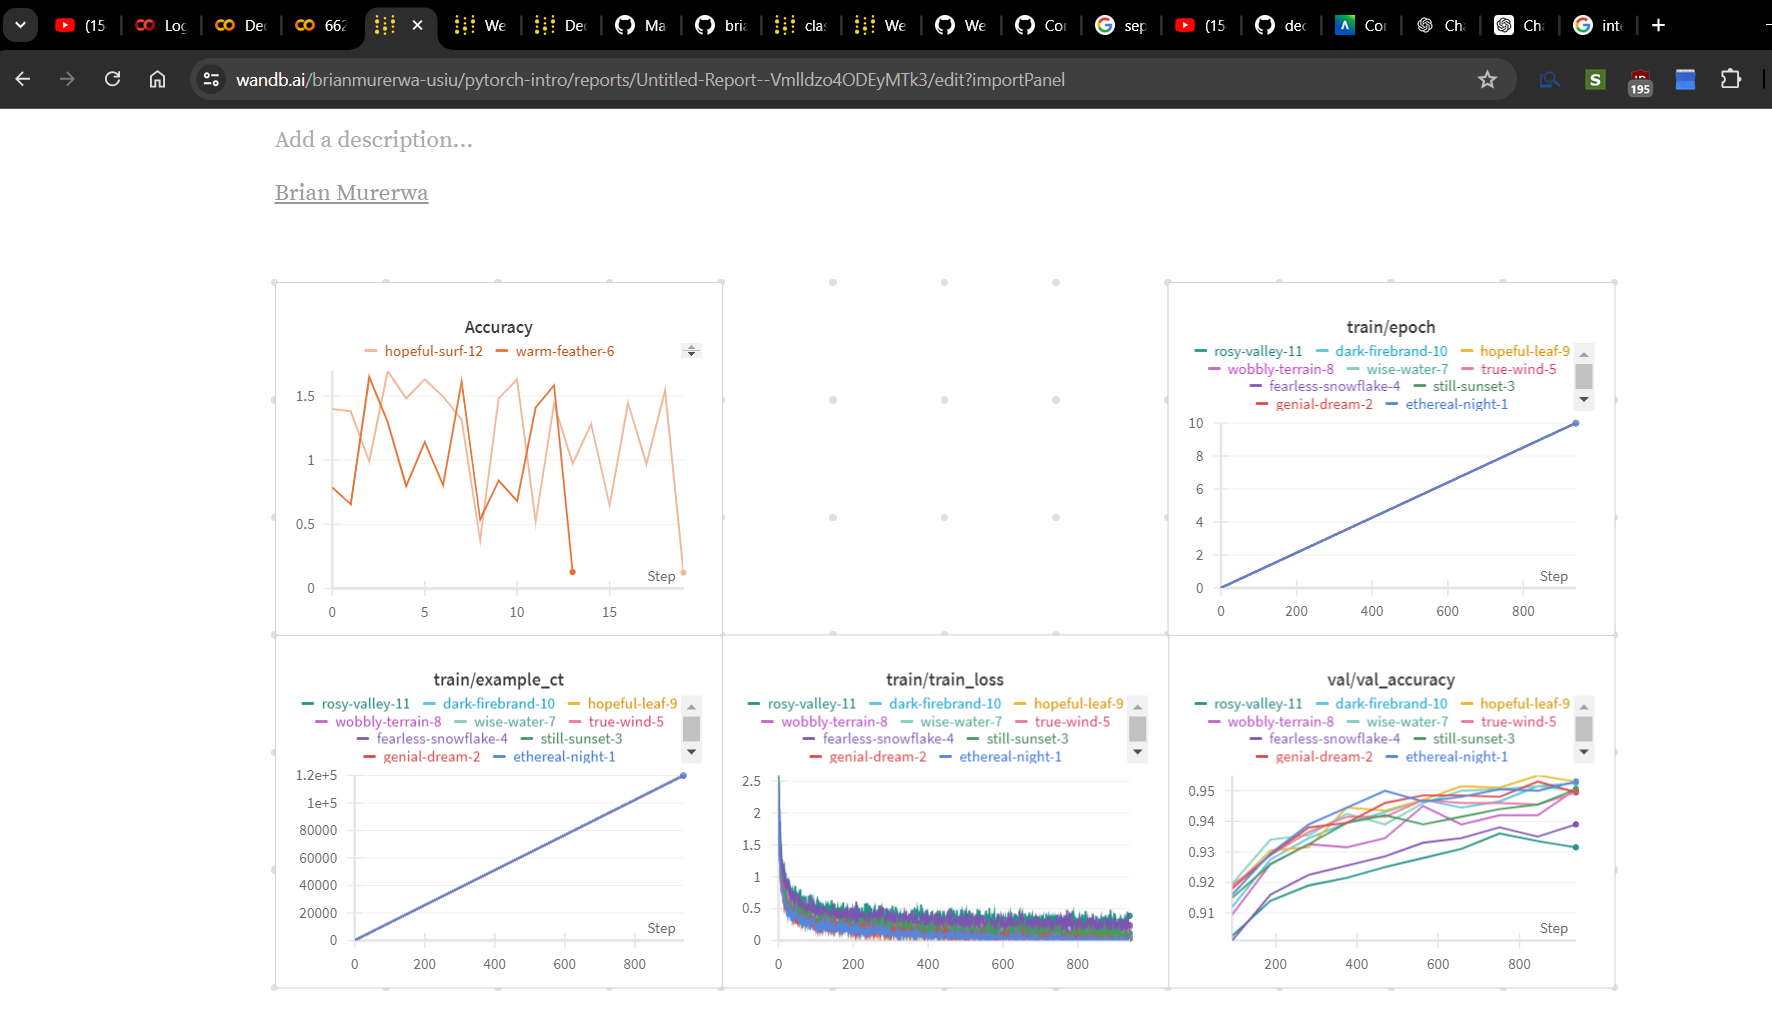

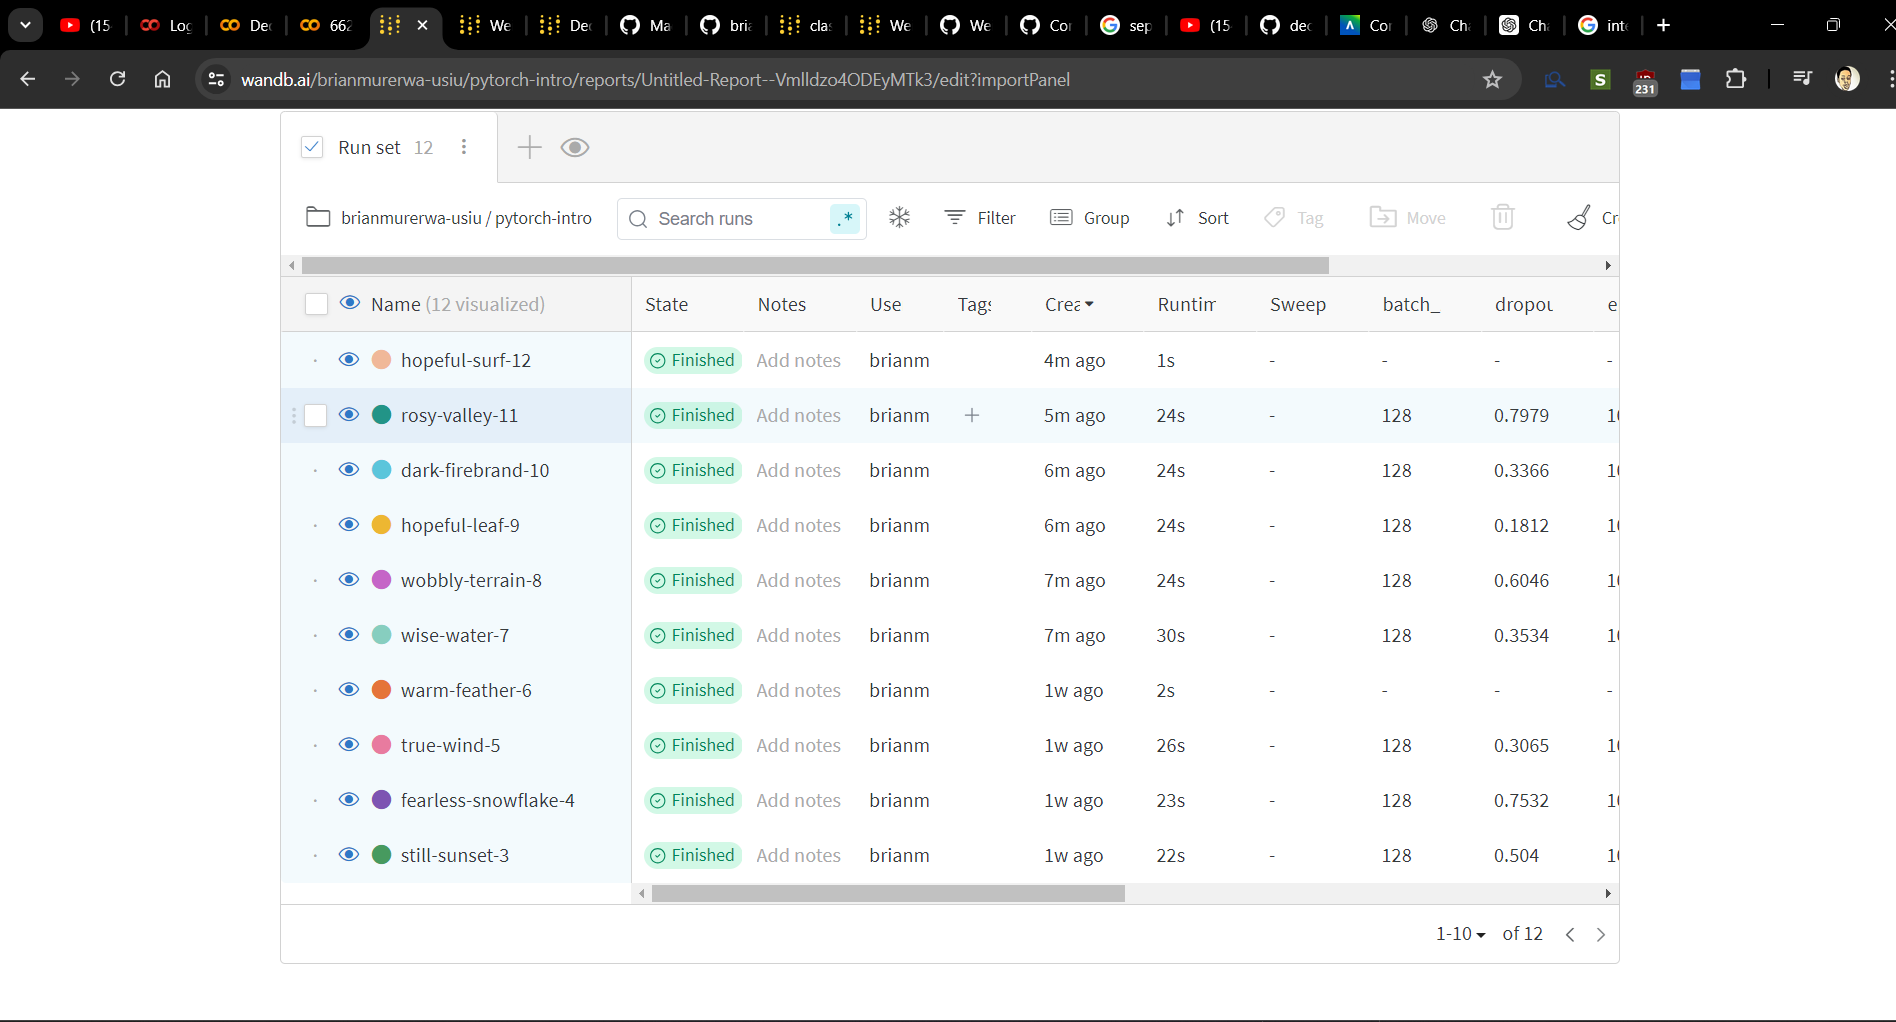

Assignment to Detect Phishing Websites

In [ ]:
!pip install pandas scikit-learn wandb matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn import tree

In [ ]:
import wandb

In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
wandb.init(project="url-phishing-detection")

wandb: Currently logged in as: brianmurerwa (brianmurerwa-usiu). Use `wandb login --relogin` to force relogin


In [ ]:
data = pd.read_csv('/content/urlset.csv', on_bad_lines='skip', encoding='latin1')

<ipython-input-15-da1a5b0b0db7>:1: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/urlset.csv', on_bad_lines='skip', encoding='latin1')


In [ ]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96005 entries, 0 to 96004
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         96005 non-null  object 
 1   ranking        95953 non-null  object 
 2   mld_res        95935 non-null  object 
 3   mld.ps_res     95924 non-null  object 
 4   card_rem       95923 non-null  float64
 5   ratio_Rrem     95923 non-null  float64
 6   ratio_Arem     95923 non-null  float64
 7   jaccard_RR     95922 non-null  float64
 8   jaccard_RA     95921 non-null  float64
 9   jaccard_AR     95920 non-null  float64
 10  jaccard_AA     95919 non-null  float64
 11  jaccard_ARrd   95919 non-null  object 
 12  jaccard_ARrem  95917 non-null  object 
 13  label          95913 non-null  float64
dtypes: float64(8), object(6)
memory usage: 10.3+ MB
None


In [ ]:
data.head(15)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971,1.0
5,smilesvoegol.servebbs.org/voegol.php,10000000,0.0,0.0,2.0,223.500000,234.000000,0.000000,0.000000,0.000000,0.000000,0,0.852227,1.0
6,premierpaymentprocessing.com/includes/boleto-2...,10000000,0.0,0.0,4.0,119.000000,121.500000,0.000000,0.000000,0.000000,0.000000,0,0.853565,1.0
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,10000000,0.0,0.0,4.0,160.500000,157.250000,0.000000,0.000000,0.000000,0.000000,0,0.777622,1.0
8,super1000.info/docs,10000000,0.0,0.0,1.0,21.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0,0.36,1.0
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,10000000,0.0,0.0,16.0,142.375000,142.500000,0.000000,0.000000,0.000000,0.000000,0,0.803006,1.0


In [ ]:
data.isnull().sum()

domain            0
ranking          52
mld_res          70
mld.ps_res       81
card_rem         82
ratio_Rrem       82
ratio_Arem       82
jaccard_RR       83
jaccard_RA       84
jaccard_AR       85
jaccard_AA       86
jaccard_ARrd     86
jaccard_ARrem    88
label            92
dtype: int64

In [ ]:
string_columns = data.select_dtypes(include=['object']).columns

In [ ]:
label_encoders = {}
for col in string_columns:
    data[col] = data[col].astype(str)  # Convert all values to strings
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Filling in the missing values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data))
data_imputed.columns = data.columns

In [ ]:
X = data_imputed.drop(columns=['label'])
y = data_imputed['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

In [ ]:
#The Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
dec_tree_accuracy = accuracy_score(y_test, y_pred_dec_tree)

In [ ]:
import pydotplus

In [ ]:
from IPython.display import Image

In [ ]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf=clf.fit(X,y)

In [ ]:
dot_data=tree.export_graphviz(clf,feature_names=X.columns,class_names=['1','0'],filled=True,out_file=None)

In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="jaccard_ARrd <= 0.5\\nentropy = 1.0\\nsamples = 96005\\nvalue = [48101, 47904]\\nclass = 1", fillcolor="#fffefe"] ;\n1 [label="card_rem <= 4.5\\nentropy = 0.582\\nsamples = 44112\\nvalue = [6131, 37981]\\nclass = 0", fillcolor="#59ade9"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="domain <= 50717.0\\nentropy = 0.833\\nsamples = 21895\\nvalue = [5777, 16118]\\nclass = 0", fillcolor="#80c0ee"] ;\n1 -> 2 ;\n3 [label="entropy = 0.382\\nsamples = 12150\\nvalue = [902, 11248]\\nclass = 0", fillcolor="#49a5e7"] ;\n2 -> 3 ;\n4 [label="entropy = 1.0\\nsamples = 9745\\nvalue = [4875, 4870]\\nclass = 1", fillcolor="#ffffff"] ;\n2 -> 4 ;\n5 [label="ranking <= 38.0\\nentropy = 0.118\\nsamples = 22217\\nvalue = [354, 21863]\\nclass = 0", fillcolor="#3c9fe5"] ;\n1 -> 5 ;\n6 [label="entropy = 0.056\\nsamples = 21327\\nvalue = [138, 21189]\\n

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

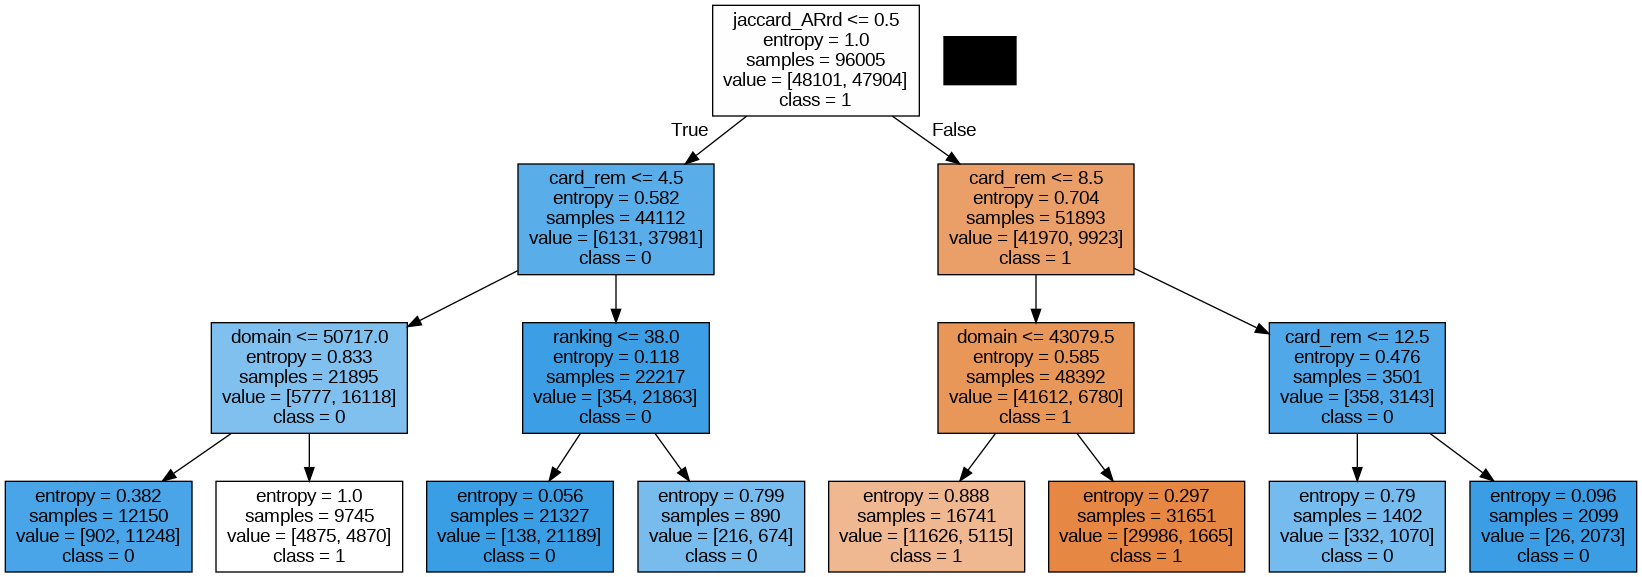

In [ ]:
graph

Image(graph.create_png())

In [ ]:
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')
print(f'Decision Tree Accuracy: {dec_tree_accuracy}')

Logistic Regression Accuracy: 0.8199083396986321
Decision Tree Accuracy: 0.9485799597250191


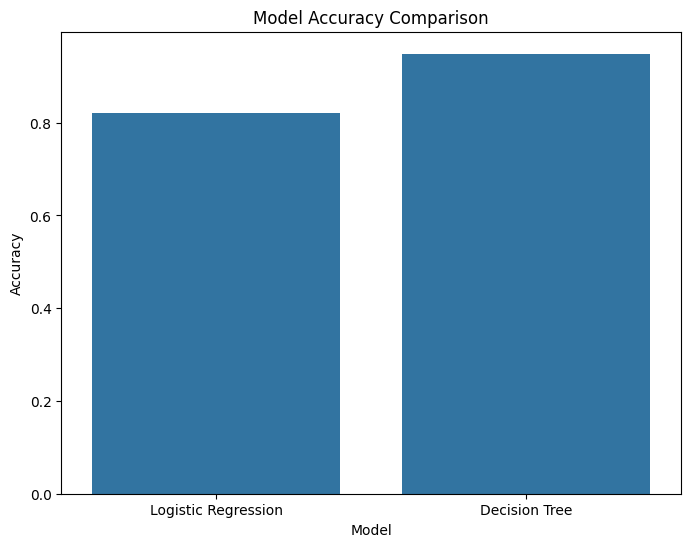

In [ ]:
plt.figure(figsize=(8, 6))
models = ['Logistic Regression', 'Decision Tree']
accuracies = [log_reg_accuracy, dec_tree_accuracy]
sns.barplot(x=models, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [ ]:
accuracy_chart_path = "model_accuracy_comparison.png"
plt.savefig(accuracy_chart_path)

<Figure size 640x480 with 0 Axes>

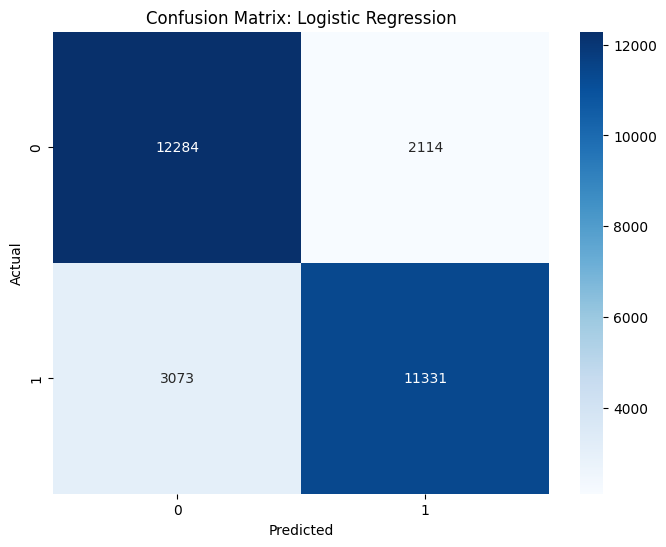

In [ ]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

In [ ]:
conf_matrix_log_reg_path = "confusion_matrix_log_reg.png"
plt.savefig(conf_matrix_log_reg_path)


<Figure size 640x480 with 0 Axes>

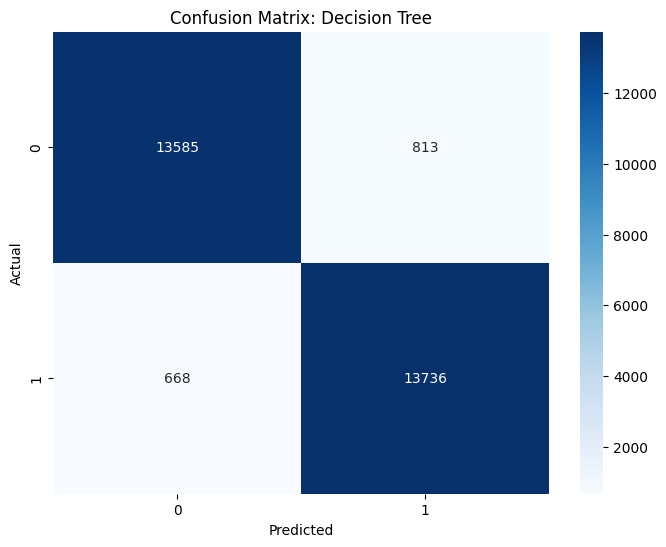

In [ ]:
conf_matrix_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dec_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Decision Tree')
plt.show()

In [ ]:
conf_matrix_dec_tree_path = "confusion_matrix_dec_tree.png"
plt.savefig(conf_matrix_dec_tree_path)

<Figure size 640x480 with 0 Axes>

In [ ]:
wandb.log({
    "Logistic Regression Accuracy": log_reg_accuracy,
    "Decision Tree Accuracy": dec_tree_accuracy,
    "Model Accuracy Comparison": wandb.Image(accuracy_chart_path),
    "Confusion Matrix Logistic Regression": wandb.Image(conf_matrix_log_reg_path),
    "Confusion Matrix Decision Tree": wandb.Image(conf_matrix_dec_tree_path)
})

In [ ]:
wandb.finish()

Decision Tree Accuracy,▁
Logistic Regression Accuracy,▁
Decision Tree Accuracy,0.94858
Logistic Regression Accuracy,0.81991
